In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_50411_G')

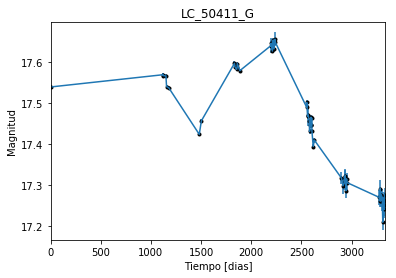

In [2]:
data = np.genfromtxt('LC_50411_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_50411_G')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

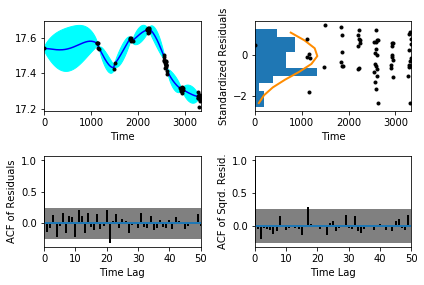

In [5]:
sample.assess_fit()

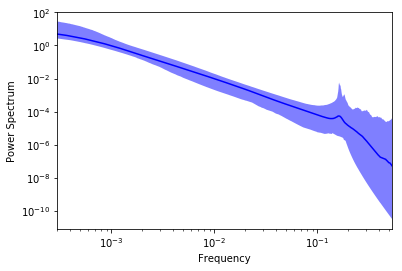

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_50411_G')

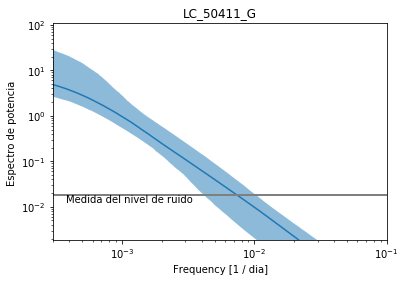

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_50411_G')

Text(0.5,1,'Prediccion , valor esperado LC_50411_G')

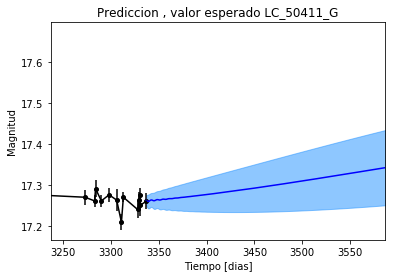

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_50411_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_50411_G')

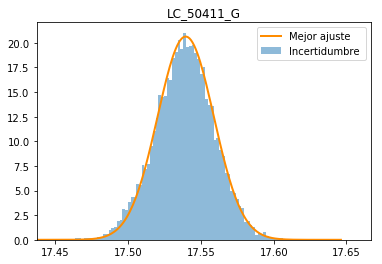

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_50411_G')

Text(0.5,1,'Interpolacion, camino simulado LC_50411_G')

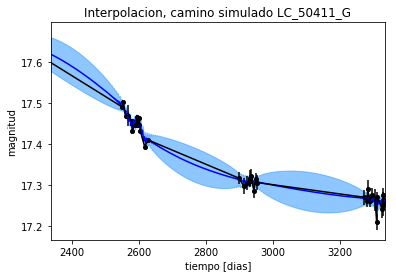

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_50411_G')

Text(0.5,1,'Interpolacion, camino simulado LC_50411_G')

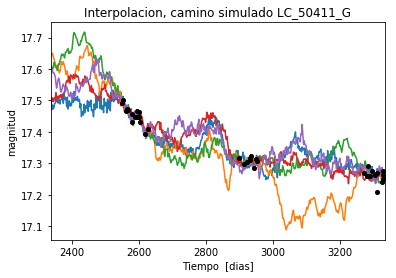

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_50411_G')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 120.421584682
Median: 0.00806606499908
Standard deviation: 0.11794493682
68% credibility interval: [ 0.00076177  0.05171597]
95% credibility interval: [  3.77064013e-04   3.92189203e-01]
99% credibility interval: [  3.15107476e-04   8.36954278e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 107.965172583
Median: 0.00801898008893
Standard deviation: 0.110530909125
68% credibility interval: [ 0.00075669  0.05126472]
95% credibility interval: [ 0.00037253  0.34810921]
99% credibility interval: [  3.15107476e-04   8.10482794e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 125.72853448
Median: 0.077357980138
Standard dev

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 209.325889434
Median: 166.444608372
Standard deviation: 2.80643175001
68% credibility interval: [ 163.7535508   169.33368283]
95% credibility interval: [ 160.75630247  172.00720761]
99% credibility interval: [ 158.36466728  172.00720761]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 148.503474395
Median: 0.682329661944
Standard deviation: 2.66648328999
68% credibility interval: [ 0.13826177  4.62115873]
95% credibility interval: [ 0.05129699  8.9624659 ]
99% credibility interval: [  0.02892177  13.81461163]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 89.6845077673
Median: 3.78083155184
Standard deviation: 15.2590378864
68% credibility interval: [  1.07810273  27.73565078]
95% credibility interval: [  1.0081771 

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20022.4961724
Median: 6.71697564241e-41
Standard deviation: 1.67276507943e+93
68% credibility interval: [  2.42480424e-120   3.27752165e-003]
95% credibility interval: [  1.80150556e-125   8.89179824e+001]
99% credibility interval: [  2.83280780e-126   1.21882289e+002]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 733.165200654
Median: 17.4771929648
Standard deviation: 0.0502927602371
68% credibility interval: [ 17.42688902  17.5194312 ]
95% credibility interval: [ 17.37115125  17.57662415]
99% credibility interval: [ 17.33448044  17.62444772]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 179.827750729
Median: 0.250037130777
Standard deviation: 0.281864535327
68% credibility interval: [ 0.16413854  0.83252335]
95% credibility interval: [ 0.14270806  0.94978263]
99% credibility interval: [ 0.          1.03763523]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 179.827750729
Median: 0.250037130777
Standard deviation: 0.281864535327
68% credibility interval: [ 0.16413854  0.83252335]
95% credibility interval: [ 0.14270806  0.94978263]
99% credibility interval: [ 0.          1.03763523]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 59.5656014438
Median: 0.0
Standard deviation: 9.90863682207e-05
68% cred

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 209.325889434
Median: 166.444608372
Standard deviation: 2.80643175001
68% credibility interval: [ 163.7535508   169.33368283]
95% credibility interval: [ 160.75630247  172.00720761]
99% credibility interval: [ 158.36466728  172.00720761]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 70.7128485414
Median: 0.00946358543643
Standard deviation: 0.0099224259849
68% credibility interval: [ 0.00710963  0.0159202 ]
95% credibility interval: [ 0.00530321  0.04041862]
99% credibility interval: [ 0.00452932  0.05972713]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 542.015854671
Median: 0.975373902875
Standard deviation: 0.191976468778
68% credibility interval: [ 0.82518438  1.17234256]
95% credibility interval: [ 0.7000326   1.47524243]
99% credibility interval: [ 0.64038556  1.63854147]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 162.391334246
Median: 0.0108471127711
Standard deviation: 0.288358929484
68% credibility interval: [ 0.00101124  0.15942391]
95% credibility interval: [  5.09719068e-04   9.82224676e-01]
99% credibility interval: [  3.80794169e-04   1.83096633e+00]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 120.421584682
Median: (-0.050680581089-5.27241715606j)
Standard deviation: 1.91980487574
68% credibility interval: [-0.32494103-1.41081964j -0.00478636-1.02613298j]
95% credibility interval: [ -2.46419744e+00-0.05727418j  -2.36916307e-03-0.79915427j]
99% credibility interval: [ -5.25873882e+00-2.75497804j  -1.97987866e-03-1.01917544j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 107.965172583
Median: (-0.0503847378733+3.99736823099j)
Standard deviation: 1.90230839588
68% credibility interval: [-0.32210573+4.77009553j -0.00475444+1.03768178j]
95% credibility interval: [-2.18723467+0.51453002j -0.00234068+0.02693096j]
99% credibility interval: [ -5.09241359e+00+4.6576629j   -1.97987866e-03+1.01917544j]
Posterior summa